#### EJERCICIO 4

Los datos del fichero kevlar.txt corresponden al tiempo hasta el fallo (en horas) de 101
barras de un material utilizado en los transbordadores espaciales, llamado Kevlar49/epoxy,
sometidas a un cierto nivel de esfuerzo. Los datos han sido tomados de Barlow et al. (1984).
1. Calcular las principales medidas descriptivas numéricas de estos datos.
2. Representar un diagrama de cajas.
3. Representar un histograma con un número de clases apropiado.
4. Estudiar la presencia de datos atípicos en la muestra. Si hay datos atípicos, suprímelos y repite todos los apartados anteriores. Compara los resultados obtenidos.

Se importan las librerías necesarias:

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

Se convierte el fichero a csv:

In [7]:
# Abrir el archivo de texto y crear el archivo CSV
with open('C:\\Users\\Usuario\\Desktop\\STAT\\Hoja 1\\Data\\kevlar.txt', 'r+') as txtfile, \
     open('C:\\Users\\Usuario\\Desktop\\STAT\\Hoja 1\\Data\\kevlar.csv', 'w', newline='') as csvfile:

    # Leer el archivo de texto línea por línea y escribir en el archivo CSV
    for line in txtfile:
        # Reemplazar "," con "."
        contenido_actualizado = line.replace(",", ".")
        # Dividir los valores en cada línea en una lista
        row = contenido_actualizado.strip().split()
        # Crear un objeto csv writer y escribir la lista en el archivo CSV
        writer = csv.writer(csvfile)
        writer.writerow(row)

    # Truncar el archivo de texto
    txtfile.seek(0)
    txtfile.truncate()

1. Principales medidas descriptivas de los datos: 

In [14]:
data = pd.read_csv('C:\\Users\\Usuario\\Desktop\\STAT\\Hoja 1\\Data\\kevlar.csv',header=None)

In [15]:
data.describe()

,0
count,101.000000
mean,1.023861
std,1.117342
min,0.010000
25%,0.240000
50%,0.800000
75%,1.450000
max,7.890000


2. Diagrama de cajas y bigotes
3. Histograma

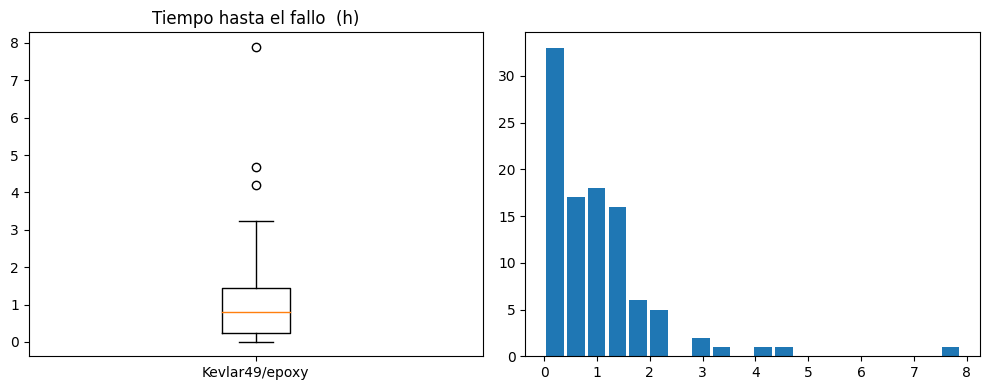

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4)) # se crean la figura y los ejes
ax1.boxplot(data) # se dibuja el diagrama de cajas
ax1.set_xticklabels(['Kevlar49/epoxy'])
ax1.set_title('Tiempo hasta el fallo  (h)')
ax2.hist(data.iloc[:, 0], bins=20, rwidth=0.85)


fig.tight_layout()
plt.show()

4. Estudio de outliers

In [43]:
# Se calcula el rango intercuartílico:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Se definen los outliers:
outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

# Se crea un nuevo dataframe sin outliers:
data2 = data[~outliers]
data2 = data2.dropna()

In [44]:
data2.describe()

,0
count,98.000000
mean,0.883980
std,0.733973
min,0.010000
25%,0.232500
50%,0.790000
75%,1.385000
max,3.240000


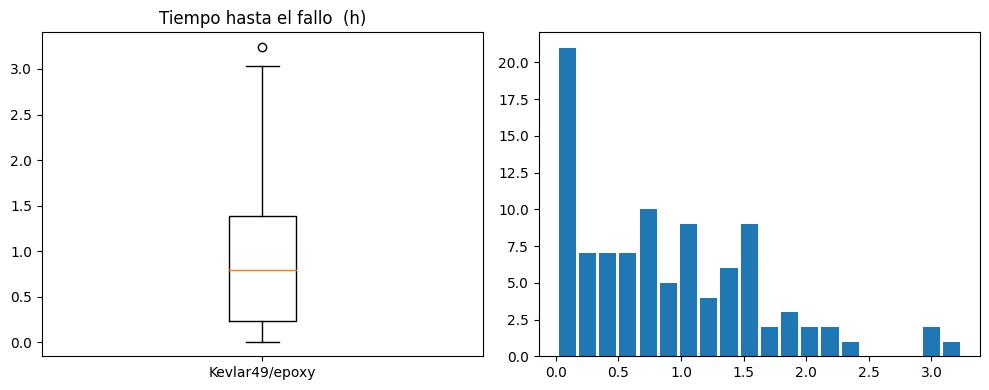

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4)) # se crean la figura y los ejes
ax1.boxplot(data2) # se dibuja el diagrama de cajas
ax1.set_xticklabels(['Kevlar49/epoxy'])
ax1.set_title('Tiempo hasta el fallo  (h)')
ax2.hist(data2.iloc[:, 0], bins=20, rwidth=0.85)


fig.tight_layout()
plt.show()